i use numpy to craete faster arrays and pandas to show them
is use mathplotlib.pyplot to show result in plot style
default_timer to show consumption time for each calculation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer

1. i have to mention a n*n matrix for pheromones and element located in row i and column j is represent pheromone ants put on the edge that it is between Agent i and Task j.
2. actually we can convert the problem to a complete bipartite graph that on section is agents and another one is tasks.
3. a edge between one node of agents ( node i ) and one node of tasks ( node j ) represent that agent i do task j.

i create a class AntColony and we can create object from them with above parameters:
   1. costs : equal to the input matrix 
   2. countAnt : euqla number of ant we want to create in this algorithm
   3. Q: our fitness function in this algorithm is Q/cost for specific edge 
   4. qPse : equal to probability of Pseudorandom Proportional 
   5. iterations: number of iteration that we want to move ants
   6. antBestN: actually only the top antBestN number of ants can put pheromones on edges
   7. firstPheromone: we put firstPheromone on all edges at first 
   8. alpha , beta : like alpha and beta we learned in the class
   9. pDecay: equal percentage of pheromone that evaporates 

1. actually we use Pseudorandom Proportional algorithm to select path for an ant
2. we use Elitist Ant System but our algorithm has a difference . only the top antBestN number of ants can put pheromones on edges.
3. after we create an object from this class we call run function and in this function we have a loop that run iterations time and in this loop we call RunAnts function that run all ants together
4. in RunAnts function we run RunAnt function that find path that the ant want to go
5. after that we calculate fitness of the path and we save best path. 
6. so after all ants went their paths we ecaporates pheromones on all edges with DecayPherm function
7. then we put pheromones on all edges that ants use them ( with their fitness ) with PutPherm
8. RunOneAnt : this is a function that we use to find next edge that ant want to use it. in this function we use probability function ( we learned this in class ) and i use choice function of numpy with probability of that


In [3]:
class AntColony():
    def __init__(self,costs,countAnt,Q,qPse,iterations,antBestN,firstPheromone,alpha,beta,pDecay):
        self.costs=costs
        self.countAnt=countAnt
        self.n=len(costs)
        self.Q=Q
        self.qPse=qPse
        self.pheromones=np.ones((self.n,self.n))*firstPheromone
        self.alpha=alpha
        self.beta=beta
        self.pDecay=pDecay
        self.iterations=iterations
        self.antBestN=antBestN
        self.best=np.inf
    def RunOneAnt(self,available,wIter):
        prob=self.pheromones[wIter,available]**self.alpha+(1/self.costs[wIter,available])**self.beta
        if np.random.rand()<self.qPse:
            return np.argmax(prob)
        if prob.sum()==0.:
            prob=np.ones(len(available))*(1/len(available))
        prob/=prob.sum()
        nextC=np.random.choice(len(available),1,p=prob)[0]
        return nextC
    def RunAnt(self):
        available=np.arange(self.n,dtype=np.int64)
        visited=np.empty(self.n,dtype=np.int64)
        for i in range(self.n):
            x=self.RunOneAnt(available,i)
            visited[i]=available[x]
            available=np.delete(available,x)
        return visited
    def CalcCost(self,visited):
        ans=0
        for i in range(self.n):
            ans+=self.costs[i,visited[i]]
        return ans
    def DecayPherm(self):
        self.pheromones*=(1-self.pDecay)
    def PutOnePherm(self,visited,amount):
        for i in range(self.n):
            self.pheromones[i,visited[i]]+=amount
    def PutPherm(self,ans,visited):
        ind=np.argsort(ans)
        ans=ans[ind]
        visited=visited[ind]
        for i in range(self.antBestN):
            self.PutOnePherm(visited[i],self.Q/ans[i])
    def RunAnts(self):
        ans=np.empty(self.countAnt)
        visited=np.empty((self.countAnt,self.n),dtype=np.int64)
        x=-1
        for i in range(self.countAnt):
            visited[i]=self.RunAnt()
            ans[i]=self.CalcCost(visited[i])
            if ans[i]<ans[x] or x==-1:
                x=i
        self.DecayPherm()
        self.PutPherm(ans,visited)
        return [ans[x],ans.mean(),ans.max(),visited[x]]
    def Run(self):
        bests=np.empty(self.iterations)
        meane=np.empty(self.iterations)
        maxe=np.empty(self.iterations)
        for i in range(self.iterations):
            best,meaned,maxed,visited=self.RunAnts()
            if self.best>best:
                self.best=best
                self.bestAnt=visited
            bests[i]=self.best
            meane[i]=meaned
            maxe[i]=maxed
        plt.plot(bests,'r')
        plt.plot(meane,'b')
        plt.plot(maxe,'g')
        display(pd.DataFrame(self.bestAnt))
        return self.best

# Test 1
1. to find best parameters for AntColony i use np.random.seed() to fixed random function and if i change one parameter and i find better answer i can say this change affect the answer.
2. in test 1 i don't have any special problem so i use specify random parameters and i get the answer

In [4]:
def OpenTest(name):
    return np.genfromtxt(name,dtype=np.int64)  

In [4]:
test1=OpenTest('job1.assign')
pd.DataFrame(test1)

,0,1,2,3
0,5,10,3,4
1,8,7,49,19
2,6,10,9,28
3,6,10,39,289


,0
0,3
1,1
2,2
3,0


26.0

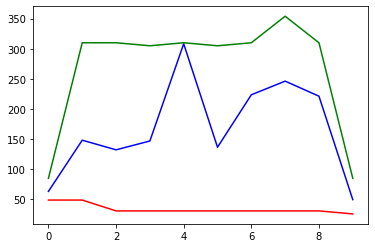

In [177]:
antColony=AntColony(costs=test1,countAnt=3,antBestN=2,Q=1,qPse=0.1,iterations=10,firstPheromone=0.4,alpha=1,beta=1,pDecay=0.4)
antColony.Run()


# Test 2
we have a 99*99 matrix so it is obvious we have to increase parameters . i use 90 ant in 100 iterations for first time i run this algorithm and i found that after a lot of test i change alpha and beta and qPse i can get better answer. and i found out if use bigger beta and alpha ( not too much ) i can get better answer . and i have to reduce qPse because this is too much and this is like we dont use pheromones at all if we use qPse = 90 percent. 
i have to mention i used firstPhermone=0.4 and pDecay=0.4 and the are equal and i found out if i change them i dont get better answer at all. and i found out if we use 20 iteration we can get best answer and after that best answer of ants converge.

In [5]:
test2=OpenTest('job2.assign')
pd.DataFrame(test2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,84,32,91,49,94,27,29,59,15,39,...,4,96,51,40,35,24,73,57,84,9
1,43,40,41,89,78,96,31,84,81,14,...,80,69,27,22,95,86,8,66,5,75
2,30,59,2,65,60,30,41,24,57,59,...,34,23,46,4,23,21,14,95,14,41
3,77,39,11,81,100,74,94,33,98,37,...,60,28,34,2,95,56,39,8,59,81
4,21,38,92,87,16,75,9,38,42,74,...,66,94,71,17,21,15,27,68,42,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65,57,4,54,94,69,1,37,80,6,...,42,70,87,72,25,35,64,99,88,26
96,10,96,3,29,14,75,86,3,8,47,...,19,92,13,83,69,77,100,59,69,99
97,94,35,39,92,71,64,85,80,90,59,...,39,85,60,50,98,16,24,35,91,93
98,53,7,97,40,57,84,61,51,67,42,...,97,48,32,42,13,73,91,28,77,44


,0
0,90
1,11
2,10
3,74
4,28
...,...
95,2
96,34
97,96
98,15


343.0

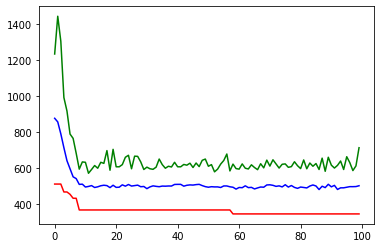

In [144]:
antColony=AntColony(costs=test2,countAnt=90,antBestN=8,qPse=0.9,Q=0.8,iterations=100,firstPheromone=0.4,alpha=3.2,beta=4,pDecay=0.4)
np.random.seed(2020)
antColony.Run()

,0
0,90
1,11
2,10
3,74
4,68
...,...
95,2
96,34
97,96
98,15


340.0

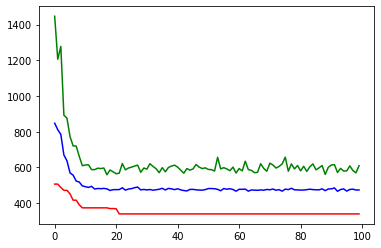

In [145]:
antColony=AntColony(costs=test2,countAnt=90,antBestN=8,qPse=0.9,Q=0.8,iterations=100,firstPheromone=0.4,alpha=4,beta=5,pDecay=0.4)
np.random.seed(2020)
antColony.Run()

,0
0,90
1,85
2,10
3,74
4,42
...,...
95,2
96,34
97,32
98,45


323.0

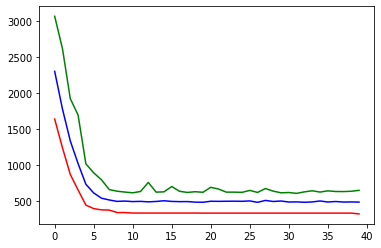

In [151]:
antColony=AntColony(costs=test2,countAnt=90,antBestN=8,qPse=0.5,Q=0.8,iterations=40,firstPheromone=0.4,alpha=4.5,beta=5,pDecay=0.4)
np.random.seed(2020)
antColony.Run()

after a lot of test i found best parameters and to make sure this is correct i use below algorithm that run AntColony for 10 times without any seed. and it was true in all but one. ( one is 356 )

,0
0,90
1,11
2,61
3,74
4,28
...,...
95,2
96,4
97,49
98,15


Answer:  356.0
time:  6.827670853999734


,0
0,90
1,11
2,10
3,74
4,40
...,...
95,2
96,34
97,96
98,15


Answer:  344.0
time:  6.679462636999233


,0
0,67
1,85
2,10
3,74
4,40
...,...
95,2
96,34
97,61
98,14


Answer:  327.0
time:  6.675642619000428


,0
0,90
1,85
2,61
3,74
4,21
...,...
95,2
96,34
97,49
98,15


Answer:  332.0
time:  6.685106373999588


,0
0,90
1,11
2,10
3,74
4,40
...,...
95,57
96,2
97,82
98,15


Answer:  303.0
time:  6.792200497000522


,0
0,90
1,11
2,10
3,74
4,68
...,...
95,6
96,2
97,96
98,15


Answer:  356.0
time:  6.726189273000273


,0
0,90
1,11
2,10
3,74
4,68
...,...
95,45
96,34
97,82
98,15


Answer:  332.0
time:  6.727595944999848


,0
0,90
1,85
2,10
3,74
4,68
...,...
95,61
96,34
97,40
98,15


Answer:  336.0
time:  6.72485324399986


,0
0,90
1,11
2,10
3,74
4,28
...,...
95,45
96,34
97,96
98,85


Answer:  365.0
time:  6.907932639000137


,0
0,90
1,11
2,61
3,74
4,42
...,...
95,9
96,34
97,79
98,45


Answer:  342.0
time:  6.726910318000591


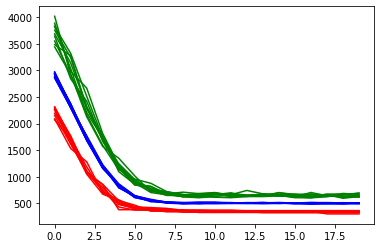

In [171]:
for i in range(10):
    start = timer()
    antColony=AntColony(costs=test2,countAnt=90,antBestN=8,qPse=0.3,Q=0.8,iterations=20,firstPheromone=0.4,alpha=4.5,beta=5,pDecay=0.4)
    print("Answer: ",antColony.Run())
    print("time: ",timer()-start)

,0
0,90
1,85
2,61
3,74
4,28
...,...
95,45
96,34
97,32
98,14


Answer:  344.0
time:  13.657305870000528


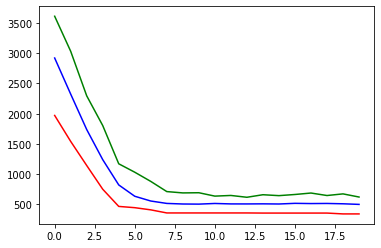

In [172]:
start=timer()
antColony=AntColony(costs=test2,countAnt=90,antBestN=8,qPse=0.3,Q=0.8,iterations=20,firstPheromone=0.4,alpha=4.5,beta=5,pDecay=0.4)
print("Answer: ",antColony.Run())
print("time: ",timer()-start)

# Test 3
like above test i found out after 20 iteration best answer of ants converge. 
and i found out if i use bigger countAnt and antBestN i get better answer . ( actually if i increase countAnt i have to increase antBestN too to get better ans )  
and i found ouf if i use less qPse i get better answer too. 
actually if i use less countAnt sum of our pheromones on edges is so low and prob of select better node is low.


In [6]:
test3=OpenTest('job3.assign')
pd.DataFrame(test3)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,69,147,93,166,68,39,104,62,2,67,...,62,156,64,160,39,116,57,115,98,19
1,105,171,96,43,136,63,35,134,26,167,...,36,4,128,161,60,68,66,121,109,58
2,131,188,100,195,19,150,189,62,151,159,...,42,141,172,10,172,12,153,77,97,45
3,131,45,134,177,6,62,94,143,183,70,...,184,25,194,76,60,139,53,49,107,160
4,13,26,72,109,128,6,113,100,90,88,...,30,78,145,69,110,197,42,144,94,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,69,127,83,50,188,33,86,35,130,13,...,37,11,57,145,179,115,11,197,96,175
196,19,22,146,171,86,103,52,85,134,188,...,196,20,170,142,128,126,79,77,45,113
197,63,118,65,118,126,90,35,190,146,121,...,15,12,127,24,171,15,143,166,182,138
198,95,47,91,50,112,98,15,127,78,30,...,52,96,74,7,2,151,1,28,180,175


,0
0,8
1,27
2,93
3,176
4,174
...,...
195,97
196,12
197,153
198,60


Answer:  743.0
time:  402.8825789980001


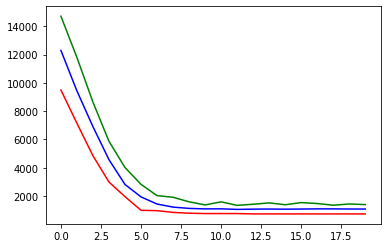

In [182]:
start=timer()
antColony=AntColony(costs=test3,countAnt=180,antBestN=8,qPse=0.3,Q=0.8,iterations=20,firstPheromone=0.4,alpha=4.5,beta=5,pDecay=0.4)
print("Answer: ",antColony.Run())
print("time: ",timer()-start)

# Test 4
like above test we can use parameters like test3 but we have to increate countAnt and antBestN together to get better answer.  actually we have 810 countAnt but if we use bigger countAnt we get better answer ( but it consumes a lot of time and if it is so big we cant get good answer because we look phermonones more that costs. )


In [7]:
test4=OpenTest('job4.assign')
pd.DataFrame(test4)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1720,2837,2531,795,299,91,3473,2110,1250,482,...,398,2081,272,746,2683,2184,1694,460,1322,1001
1,3370,649,940,1531,2676,1270,294,2635,1784,3704,...,1901,2408,524,271,2020,2242,644,2936,1042,213
2,688,124,146,914,3329,2424,3263,1882,2137,974,...,2279,233,1607,448,276,3351,830,2903,1483,2112
3,186,795,1971,1038,1302,1907,2333,2801,1699,2094,...,1493,2606,2970,1051,3628,390,1733,1318,3338,3031
4,464,2220,3632,3148,504,1501,2101,3163,538,2747,...,1507,3869,2198,1148,2033,2961,2827,1717,2057,3574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3770,3045,116,3708,1113,3600,3856,1239,3149,2570,...,3790,3957,1988,3758,610,2358,147,3939,746,3661
996,3197,3125,3083,3251,3113,2114,1265,1414,3140,2016,...,3418,1738,77,1932,3667,3277,2478,3480,1655,534
997,2382,2232,1465,3044,1464,3358,3471,2799,712,3764,...,2599,3762,3328,1908,3189,1436,2690,133,3212,3595
998,569,3636,1688,3284,1509,2191,948,1804,3253,2287,...,3754,3127,3350,3561,614,3139,3330,3611,2676,2764


,0
0,95
1,762
2,619
3,169
4,460
...,...
995,934
996,866
997,476
998,298


Answer:  22540.0
time:  98.85048809099862


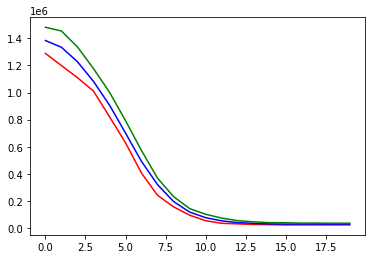

In [13]:
start=timer()
antColony=AntColony(costs=test4,countAnt=90,antBestN=8,qPse=0.3,Q=0.8,iterations=20,firstPheromone=0.4,alpha=4.5,beta=5,pDecay=0.4)
print("Answer: ",antColony.Run())
print("time: ",timer()-start)

,0
0,95
1,762
2,619
3,169
4,460
...,...
995,910
996,263
997,69
998,866


Answer:  21515.0
time:  885.9895695359992


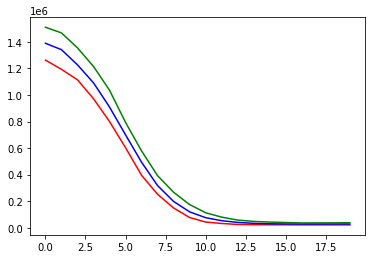

In [15]:
start=timer()
antColony=AntColony(costs=test4,countAnt=810,antBestN=16,qPse=0.3,Q=0.8,iterations=20,firstPheromone=0.4,alpha=4.5,beta=5,pDecay=0.4)
print("Answer: ",antColony.Run())
print("time: ",timer()-start)

like below test we can say if we use bigger countAnt ( not too much ) we get better answer but it takes more time.

,0
0,95
1,762
2,619
3,169
4,460
...,...
995,910
996,24
997,818
998,649


Answer:  20764.0
time:  1772.9834175209999


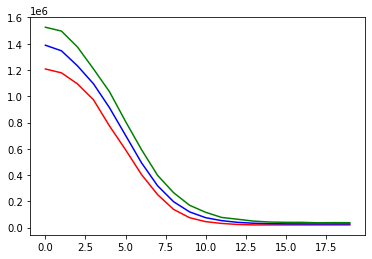

In [17]:
start=timer()
antColony=AntColony(costs=test4,countAnt=1620,antBestN=32,qPse=0.3,Q=0.8,iterations=20,firstPheromone=0.4,alpha=4.5,beta=5,pDecay=0.4)
print("Answer: ",antColony.Run())
print("time: ",timer()-start)

# Test 5
it is obvious if we use bigger countAnt like 3240 and antBestN=32 we can get better answer but this consumes a lot of time.

In [5]:
test5=OpenTest('job5.assign')
pd.DataFrame(test5)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1599,3393,5695,1418,6012,2773,1975,5559,1145,1225,...,1266,6664,2681,5070,5313,3471,1433,3755,4604,3025
1,5482,2020,5366,6760,1343,6068,2603,3016,7671,6621,...,5090,7600,7282,5552,2131,7371,5312,5232,5090,6841
2,6871,5294,6841,2783,7738,6916,2843,6099,3479,2547,...,5089,1157,3933,4334,6644,4678,2423,6030,6847,6866
3,4734,190,694,4793,2313,7967,4607,2691,1627,7457,...,6166,3456,7794,7856,606,6015,6078,4185,1117,1073
4,4129,4493,6115,3045,7127,3015,4458,6788,4183,2828,...,1396,6324,429,5726,4209,679,1586,2481,3415,6688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3850,5703,274,476,7046,6441,7867,693,1815,6548,...,6208,5213,1074,5159,5227,1367,5082,5431,3158,6943
1996,1130,3541,4774,6367,6137,5367,3097,4753,4403,7189,...,1075,1006,7402,4267,3661,285,4323,6817,2591,7670
1997,7971,1749,1632,6136,7033,579,2076,2714,2757,3539,...,2454,3713,372,7933,4800,1588,4387,3237,1474,5132
1998,4990,3699,3409,1695,4876,3665,1137,3468,969,5306,...,5607,1412,7828,547,2108,1829,7709,33,146,7938


,0
0,433
1,1191
2,1816
3,463
4,957
...,...
1995,1497
1996,260
1997,1824
1998,1960


Answer:  58269.0
time:  200.97731473500002


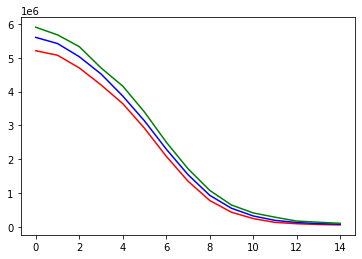

In [6]:
start=timer()
antColony=AntColony(costs=test5,countAnt=90,antBestN=8,qPse=0.3,Q=0.8,iterations=15,firstPheromone=0.4,alpha=4.5,beta=5,pDecay=0.4)
print("Answer: ",antColony.Run())
print("time: ",timer()-start)

,0
0,433
1,1191
2,1816
3,463
4,957
...,...
1995,1941
1996,1210
1997,1809
1998,1960


Answer:  52747.0
time:  1798.04084174


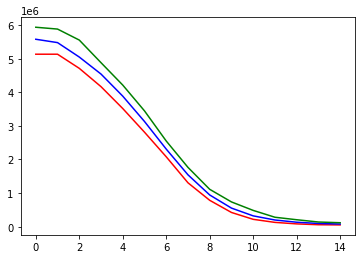

In [7]:
start=timer()
antColony=AntColony(costs=test5,countAnt=810,antBestN=16,qPse=0.3,Q=0.8,iterations=15,firstPheromone=0.4,alpha=4.5,beta=5,pDecay=0.4)
print("Answer: ",antColony.Run())
print("time: ",timer()-start)